In [1]:
import os 

In [2]:
import numpy as np
import sklearn
import pandas as pd

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv('./dataSet/train.csv')

In [4]:
X = df.drop(['f_27', 'target'], axis= 1)
y = df.target
print('Class Label :', np.unique(y))

Class Label : [0 1]


In [5]:
#to evaluate how well trained model performs on unseen data 

#split data to taining and testing datase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1, stratify = y )
#stratification helps in splitting dataset depending on the target proportion

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

In [ ]:
#scaling 
from sklearn.preprocessing import  StandardScaler  
sc = StandardScaler() #loading the standard scaler object
sc.fit(X_train) #using fit estimated the mean and sigma
X_train_std = sc.transform(X_train) # standardised the data using the parameters
X_test_std = sc.transform(X_test) #used the same parameter to standadrdise the test data
#so that both valuess are in training and test dataset are comparable

In [ ]:
#loading perceptron from sklearn lib
from sklearn.linear_model import  Perceptron
ppn = Perceptron(n_iter = 40, eta0= 0.1, random_state= 1)
ppn.fit(X_train_std, y_train)

In [15]:
y_pred = ppn.predict(X_test_std)

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [16]:
print('Misclassified samples : %d ' % ((y_test != y_pred).sum()))

Misclassified samples : 124420 


In [17]:
y_test.shape

(270000,)

In [24]:
print('Error :', 124420/270000)
print ('Accuracy : 1- error = ' , 1-0.4608148148148148 )

Error : 0.4608148148148148
Accuracy : 1- error =  0.5391851851851852


In [25]:
#let's check the accuacy from the metric
from sklearn.metrics import accuracy_score
print('Accuracy : %.2f' % accuracy_score(y_test, y_pred))

Accuracy : 0.54


In [26]:
# score = predict & accuracy score

In [27]:
# running the logreg through the adaline method. 
class LogisticRegressionGD(object):
    """ Adaline Classifier
    Parameters:
    eta : float 
    Learning rate btwn 0.0 1.0
    random_state : initalisation seed
    n_iter : int
    passes over training dataset
    shuffle : shuffles training data every epoch if true to prevent cycles
    radom_state : int

    Attributes : 
    w_ : single array random generated
    cost_ : list
    logstic value in each epoch 
    """
   
    def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter #of epochs
        self.random_state = random_state

    def fit(self, X, y):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1] )
        self.cost_ = []
        for i in range (self.n_iter):
            net_input = self.net_input(X) #dimention n*1
            output = self.activation(net_input)  #dimention n*1
            errors = y - output # y dimention n*1 , error dimention = n*1
            self.w_[1:] += self.eta* X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
            
        return self
    def net_input(self, X):
        """ net input = w'.x 
        where self.w_[0] is the bias  also refered as the activation
        """
        return np.dot(X, self.w_[1:]) + self.w_[0] # w - dimension p*1 
# x - dimension n*p ; net_input = z simention = n*1 
   
    def activation(self, z):
        "Compute linear activation"
        return 1./(1 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    



In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( C = 100, random_state= 1)
lr.fit(X_train_std, y_train)

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
X_combined_std  = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [65]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions (X, y, classifier , test_idx = None, resolution = 1):
    #setup marker generator and color map

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
#plot decision surface
    x1_min, x1_max = np.int(X.iloc[:,0].min()-1), np.int(X.iloc[:,0].max()+1) 
    x2_min, x2_max = np.int(X.iloc[:,1].min()-1), np.int(X.iloc[:,1].max()+1) 
    x1s = np.linspace(x1_min, x1_max, resolution)
    x2s = np.linspace(x2_min, x2_max, resolution)
    x1, x2 = np.meshgrid(x1s, x2s)
    print(x1.shape)
    X_set = np.c_[x1.ravel(), x2.ravel()] 
    print(X_set)
    y_pred = classifier.predict(X_set).reshape(x1.shape)
    print('y_pred shape : :', y_pred.shape)
    y_decision = classifier.decision_function(X_set)#.reshape(x1.shape)
    plt.contour(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contour(x1, x2, y_decision, cmap=plt.cm.brg, alpha=0.1)

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_train_std[y_train == cl, 1], 
                    y=X_train_std[y_train == cl, 2],
                    alpha=0.3, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    #highlight test examples
    if test_idx:
        # plot all examples
    
        X_test, y_test = X[105:150, :], y[105:150]

        plt.scatter(X_test[:, 1],
                X_test[:, 2],
                c='none',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100, 
                label='Test set')        


In [28]:
plot_decision_regions(X_combined_std, y_combined, classifier= lr, test_idx=range(105,150))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

NameError: name 'X_combined_std' is not defined

* probability that certain training example belonng to certain class can be computed :
* the first and second number can be summed to = 1

In [58]:
lr.predict_proba(X_test_std[:, :])

array([[0.4280207 , 0.5719793 ],
       [0.64496949, 0.35503051],
       [0.66754545, 0.33245455]])

In [59]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis = 1)

array([1, 0, 0])

In [60]:
lr.predict(X_test_std[:3,:])

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([1, 0, 0])

## C - Regularization in LogReg == L2 regulatiaq5ion 
* to penalise the extreme parameter (weight)
Logistc Regression (C = ) C - paramreter = inverse of regulrization .
* can control how well we fit the data by keeping weights small.  == 

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

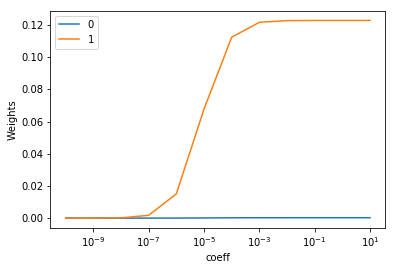

In [72]:
weights, params =[], []
for c in np.arange(-10, 2):
    lr = LogisticRegression(C = 10.**c, random_state= 1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0]) # to obtain weight of each feature
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label = '0')
plt.plot(params, weights[:,1], label = '1')
plt.ylabel('Weights')
plt.xlabel('coeff')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()


the weight coefficient shrinks if decrease C= regularization strength

In [66]:
x = lr.coef_ 

### Non linear - SVM 

In [ ]:
from sklearn.svm import SVC
svm = SVC( kernel= 'rbf', random_state= 42, gamma = 0.10, C = 10.0)

In [32]:
X_subset = X.iloc[:20000, 1:3].astype('int')
y_subset = y.iloc[:20000]

In [42]:
svm.fit(X_subset, y_subset )

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
svm.decision_function(X_subset).reshape(shape

(20000,)

(1, 1)
[[-4. -4.]]
y_pred shape : : (1, 1)


/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

TypeError: Input z must be at least a 2x2 array.

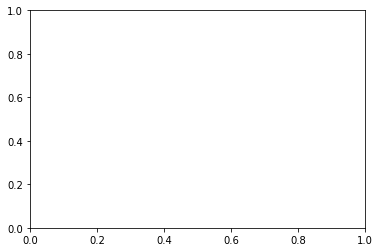

In [66]:
plot_decision_regions(X_subset, y_subset, classifier=svm, test_idx = (105, 150))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [39]:
X_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f_00    20000 non-null  int64
 1   f_01    20000 non-null  int64
dtypes: int64(2)
memory usage: 312.6 KB


### exercise 6 from O'rieley
# Decision Tree

In [6]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#define a grid of parameter
#can be dictionary or list of dictionaries

param_grid = {
    "max_depth" : [1,3,7,20],
    "max_leaf_nodes" : list(range(2,10)) 
}

#initialise the grid search
#estimaotor is the model that we have defined
# param grid : 

model = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42),
    param_grid = param_grid, 
    verbose = 10, 
    )

In [13]:
model.fit(X_train, y_train)

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num

[CV] max_depth=1, max_leaf_nodes=2 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=2, score=0.5131975562021133, total=   5.5s
[CV] max_depth=1, max_leaf_nodes=2 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV] ...... max_depth=1, max_leaf_nodes=2, score=0.5132, total=   4.9s
[CV] max_depth=1, max_leaf_nodes=2 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=2, score=0.5131976818937233, total=   5.4s
[CV] max_depth=1, max_leaf_nodes=3 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.4s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=3, score=0.5342974557264013, total=   7.3s
[CV] max_depth=1, max_leaf_nodes=3 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.8s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=3, score=0.5331095238095238, total=   6.1s
[CV] max_depth=1, max_leaf_nodes=3 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.1s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=3, score=0.5329263472683203, total=   5.5s
[CV] max_depth=1, max_leaf_nodes=4 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   35.9s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=4, score=0.5342974557264013, total=   5.8s
[CV] max_depth=1, max_leaf_nodes=4 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   41.8s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=4, score=0.5331095238095238, total=   4.5s
[CV] max_depth=1, max_leaf_nodes=4 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   46.6s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=4, score=0.5329263472683203, total=   4.5s
[CV] max_depth=1, max_leaf_nodes=5 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   51.3s remaining:    0.0s
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=5, score=0.5342974557264013, total=   5.7s
[CV] max_depth=1, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=5, score=0.5331095238095238, total=   4.5s
[CV] max_depth=1, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=5, score=0.5329263472683203, total=   4.4s
[CV] max_depth=1, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=6, score=0.5342974557264013, total=   4.5s
[CV] max_depth=1, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=6, score=0.5331095238095238, total=   4.5s
[CV] max_depth=1, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=6, score=0.5329263472683203, total=   4.5s
[CV] max_depth=1, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=7, score=0.5342974557264013, total=   5.2s
[CV] max_depth=1, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=7, score=0.5331095238095238, total=   5.4s
[CV] max_depth=1, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=7, score=0.5329263472683203, total=   4.8s
[CV] max_depth=1, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=8, score=0.5342974557264013, total=   4.6s
[CV] max_depth=1, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=8, score=0.5331095238095238, total=   5.1s
[CV] max_depth=1, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=8, score=0.5329263472683203, total=   5.2s
[CV] max_depth=1, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=9, score=0.5342974557264013, total=   5.3s
[CV] max_depth=1, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=9, score=0.5331095238095238, total=   4.6s
[CV] max_depth=1, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=1, max_leaf_nodes=9, score=0.5329263472683203, total=   4.4s
[CV] max_depth=3, max_leaf_nodes=2 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=2, score=0.5131975562021133, total=   4.4s
[CV] max_depth=3, max_leaf_nodes=2 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV] ...... max_depth=3, max_leaf_nodes=2, score=0.5132, total=   4.5s
[CV] max_depth=3, max_leaf_nodes=2 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=2, score=0.5131976818937233, total=   4.4s
[CV] max_depth=3, max_leaf_nodes=3 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=3, score=0.5342974557264013, total=   6.5s
[CV] max_depth=3, max_leaf_nodes=3 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=3, score=0.5331095238095238, total=   7.3s
[CV] max_depth=3, max_leaf_nodes=3 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=3, score=0.5329263472683203, total=   8.1s
[CV] max_depth=3, max_leaf_nodes=4 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=4, score=0.5487211965657306, total=   9.1s
[CV] max_depth=3, max_leaf_nodes=4 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=4, score=0.5613952380952381, total=   9.7s
[CV] max_depth=3, max_leaf_nodes=4 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=4, score=0.5606360030285858, total=   9.5s
[CV] max_depth=3, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=5, score=0.5729448907386155, total=   9.5s
[CV] max_depth=3, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV] ....... max_depth=3, max_leaf_nodes=5, score=0.567, total=   9.7s
[CV] max_depth=3, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=5, score=0.5634883975637979, total=  10.0s
[CV] max_depth=3, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=6, score=0.5729448907386155, total=   9.1s
[CV] max_depth=3, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=6, score=0.5673095238095238, total=   8.6s
[CV] max_depth=3, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=6, score=0.5645026881080386, total=   8.8s
[CV] max_depth=3, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=7, score=0.5729448907386155, total=  10.1s
[CV] max_depth=3, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=7, score=0.5673095238095238, total=   9.4s
[CV] max_depth=3, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=7, score=0.5645026881080386, total=   9.4s
[CV] max_depth=3, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=8, score=0.5729448907386155, total=   9.3s
[CV] max_depth=3, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=8, score=0.5673095238095238, total=   9.8s
[CV] max_depth=3, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=8, score=0.5645026881080386, total=   9.3s
[CV] max_depth=3, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=9, score=0.5729448907386155, total=  10.1s
[CV] max_depth=3, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=9, score=0.5673095238095238, total=   9.0s
[CV] max_depth=3, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=3, max_leaf_nodes=9, score=0.5645026881080386, total=   9.5s
[CV] max_depth=7, max_leaf_nodes=2 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=2, score=0.5131975562021133, total=   6.0s
[CV] max_depth=7, max_leaf_nodes=2 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV] ...... max_depth=7, max_leaf_nodes=2, score=0.5132, total=   5.5s
[CV] max_depth=7, max_leaf_nodes=2 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=2, score=0.5131976818937233, total=   5.9s
[CV] max_depth=7, max_leaf_nodes=3 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=3, score=0.5342974557264013, total=   9.0s
[CV] max_depth=7, max_leaf_nodes=3 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=3, score=0.5331095238095238, total=   9.4s
[CV] max_depth=7, max_leaf_nodes=3 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=3, score=0.5329263472683203, total=   7.9s
[CV] max_depth=7, max_leaf_nodes=4 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=4, score=0.5487211965657306, total=  10.4s
[CV] max_depth=7, max_leaf_nodes=4 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=4, score=0.5613952380952381, total=   8.9s
[CV] max_depth=7, max_leaf_nodes=4 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=4, score=0.5606360030285858, total=   9.0s
[CV] max_depth=7, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=5, score=0.5729448907386155, total=  10.3s
[CV] max_depth=7, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV] ....... max_depth=7, max_leaf_nodes=5, score=0.567, total=  10.0s
[CV] max_depth=7, max_leaf_nodes=5 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=5, score=0.5634883975637979, total=   9.2s
[CV] max_depth=7, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=6, score=0.5729448907386155, total=  11.6s
[CV] max_depth=7, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=6, score=0.5867523809523809, total=  12.2s
[CV] max_depth=7, max_leaf_nodes=6 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=6, score=0.5779027519178663, total=  11.8s
[CV] max_depth=7, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=7, score=0.587749582144847, total=  11.7s
[CV] max_depth=7, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=7, score=0.5947714285714286, total=  10.2s
[CV] max_depth=7, max_leaf_nodes=7 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=7, score=0.5896599507616703, total=  10.6s
[CV] max_depth=7, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=8, score=0.5943209794239075, total=  12.6s
[CV] max_depth=7, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=8, score=0.5947714285714286, total=  11.3s
[CV] max_depth=7, max_leaf_nodes=8 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=8, score=0.5945885456597413, total=  11.2s
[CV] max_depth=7, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=9, score=0.5943209794239075, total=  12.8s
[CV] max_depth=7, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=9, score=0.5952952380952381, total=  11.8s
[CV] max_depth=7, max_leaf_nodes=9 ...................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=7, max_leaf_nodes=9, score=0.5945885456597413, total=  12.4s
[CV] max_depth=20, max_leaf_nodes=2 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=2, score=0.5131975562021133, total=   5.2s
[CV] max_depth=20, max_leaf_nodes=2 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV] ..... max_depth=20, max_leaf_nodes=2, score=0.5132, total=   4.0s
[CV] max_depth=20, max_leaf_nodes=2 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=2, score=0.5131976818937233, total=   4.2s
[CV] max_depth=20, max_leaf_nodes=3 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=3, score=0.5342974557264013, total=   6.9s
[CV] max_depth=20, max_leaf_nodes=3 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=3, score=0.5331095238095238, total=   7.4s
[CV] max_depth=20, max_leaf_nodes=3 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=3, score=0.5329263472683203, total=   6.2s
[CV] max_depth=20, max_leaf_nodes=4 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=4, score=0.5487211965657306, total=   7.8s
[CV] max_depth=20, max_leaf_nodes=4 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=4, score=0.5613952380952381, total=   7.9s
[CV] max_depth=20, max_leaf_nodes=4 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=4, score=0.5606360030285858, total=   8.0s
[CV] max_depth=20, max_leaf_nodes=5 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=5, score=0.5729448907386155, total=   9.6s
[CV] max_depth=20, max_leaf_nodes=5 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV] ...... max_depth=20, max_leaf_nodes=5, score=0.567, total=   9.2s
[CV] max_depth=20, max_leaf_nodes=5 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=5, score=0.5634883975637979, total=   9.5s
[CV] max_depth=20, max_leaf_nodes=6 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=6, score=0.5729448907386155, total=  11.0s
[CV] max_depth=20, max_leaf_nodes=6 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=6, score=0.5867523809523809, total=  11.1s
[CV] max_depth=20, max_leaf_nodes=6 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=6, score=0.5779027519178663, total=  11.0s
[CV] max_depth=20, max_leaf_nodes=7 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=7, score=0.587749582144847, total=  13.4s
[CV] max_depth=20, max_leaf_nodes=7 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=7, score=0.5947714285714286, total=  14.6s
[CV] max_depth=20, max_leaf_nodes=7 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=7, score=0.5896599507616703, total=  12.9s
[CV] max_depth=20, max_leaf_nodes=8 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=8, score=0.5943209794239075, total=  13.0s
[CV] max_depth=20, max_leaf_nodes=8 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=8, score=0.5947714285714286, total=  11.1s
[CV] max_depth=20, max_leaf_nodes=8 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=8, score=0.5945885456597413, total=  15.1s
[CV] max_depth=20, max_leaf_nodes=9 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=9, score=0.5943209794239075, total=  13.4s
[CV] max_depth=20, max_leaf_nodes=9 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=9, score=0.5952952380952381, total=  12.3s
[CV] max_depth=20, max_leaf_nodes=9 ..................................


/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


[CV]  max_depth=20, max_leaf_nodes=9, score=0.5945885456597413, total=  12.9s


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 13.7min finished
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 7, 20], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [16]:
# print the best estimator for the model :
print('best parameter set :')
model.best_estimator_

best parameter set :


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [17]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print('Training accuracy :%.2f, Test accuracy : %.2f' % (accuracy_score(y_train, y_pred_train),
                                                         accuracy_score(y_test, y_pred_test)))

Training accuracy :0.60, Test accuracy : 0.60


8
*Exercise :Grow forest*

In [23]:
from sklearn.model_selection import ShuffleSplit
n_trees = 1000
n_instances = 100
mini_sets =[]
rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train)-n_instances, random_state = 42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train.iloc[mini_train_index]
    y_mini_train = y_train.iloc[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [32]:
mini_sets[505]

(            id      f_00      f_01      f_02      f_03      f_04      f_05  \
 642755  642755  0.430757 -0.146157 -0.067137  2.996723  0.029300 -0.687115   
 171571  171571 -0.613966  2.167308  0.243941  0.962217 -0.366921 -0.408444   
 360170  360170  0.556602 -1.311427 -0.184618 -0.494934  0.810293  0.229972   
 440884  440884 -0.521964  0.135832  0.264166  1.118620 -1.210445 -1.005537   
 656863  656863  0.363724 -1.484136 -0.809333 -0.805722  0.040581  0.398641   
 ...        ...       ...       ...       ...       ...       ...       ...   
 630508  630508  0.136740  1.467016  0.291146  0.254632 -0.104079 -1.047593   
 561922  561922 -1.123821  0.396315  0.849393  0.401778 -0.979149  1.106173   
 503548  503548 -0.138431 -0.782268 -0.492691 -0.122478 -1.426626  1.896314   
 131693  131693  0.236576  0.981816  0.385455 -1.517155  0.024125 -0.963164   
 691887  691887  0.371931  1.638996 -1.887929 -2.753578  0.971842 -0.273637   
 
             f_06  f_07  f_08  ...      f_20      

In [39]:
from sklearn.base import clone
forest = [clone(model.best_estimator_) for _ in range(n_trees)]
accuracy =[]

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
   # print(sklearn.metrics.accuracy_score(y_test, y_pred))
    accuracy.append(sklearn.metrics.accuracy_score(y_test, y_pred))
#printing the avg value of accuracy score
np.mean(accuracy)

/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/home/rhythm/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

0.5249157333333334

In [40]:
import warnings
warnings.filterwarnings('ignore')